<a href="https://colab.research.google.com/github/pras-4795/JPMCColab/blob/main/MLE_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import ssl
import certifi

ssl._create_default_https_context = ssl._create_default_https_context
dataset = fetch_openml(data_id=40945, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
df = dataset.frame
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    object  
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


<h2>Number of people travelling together</h2>

In [ ]:
df['num_in_party'] = df['parch'] + df['sibsp'] + 1

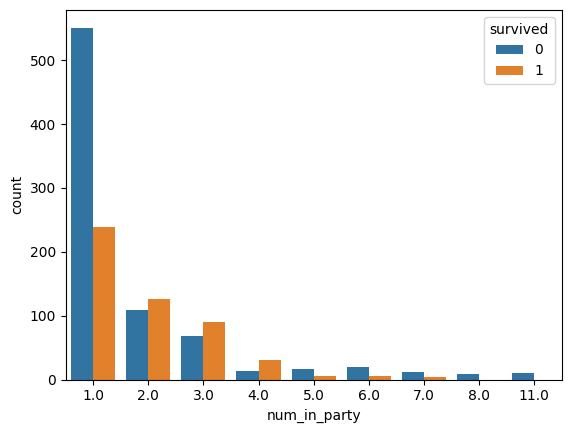

In [ ]:
sns.countplot(x='num_in_party', hue='survived', data=df)
plt.show()

Binning: Take a range of values and break them into categories

In [ ]:
df['num_in_party_grouped'] = np.where(df['num_in_party'].isin([1]), 'Alone',
                             np.where(df['num_in_party'].isin([2,3,4]), 'Small',
                             np.where(df['num_in_party'].isin([5,6,7]), 'Medium', 'Large')))

Age

In [ ]:
df['age'] = df.groupby(['sex', 'pclass'])['age'].apply(lambda val : val.fillna(val.mean()))

<ipython-input-7-6268b396ac64>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['age'] = df.groupby(['sex', 'pclass'])['age'].apply(lambda val : val.fillna(val.mean()))


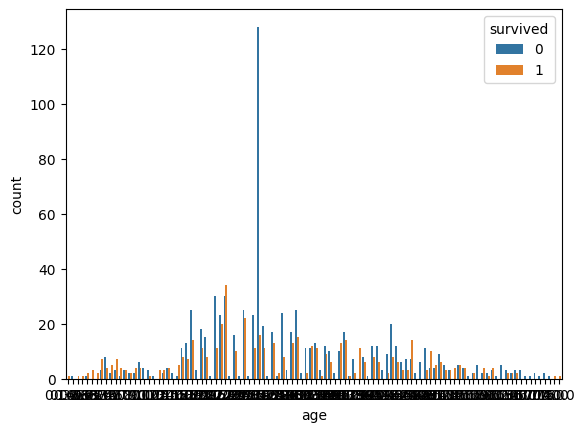

In [ ]:
sns.countplot(x='age', hue='survived', data=df)
plt.show()

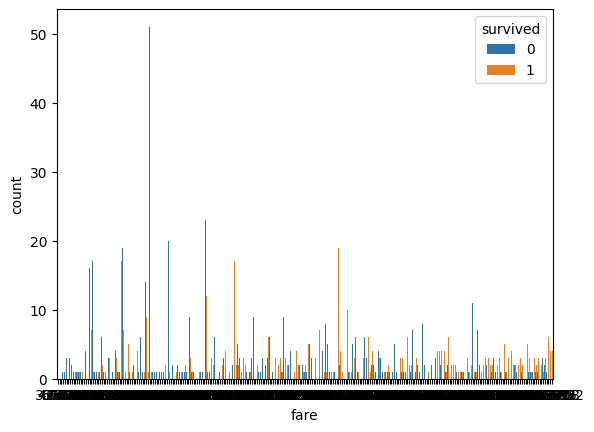

In [ ]:
sns.countplot(x='fare', hue='survived', data=df)
plt.show()

In [ ]:
AGE_BUCKETS = 7;

age_labels = [f'age_{x}' for x in range(AGE_BUCKETS)]

df['age_bucket'] = pd.qcut(df['age'], AGE_BUCKETS, labels=age_labels)

In [ ]:
df['age_bucket'].value_counts()

age_2    254
age_1    204
age_4    198
age_0    193
age_6    186
age_5    175
age_3     99
Name: age_bucket, dtype: int64

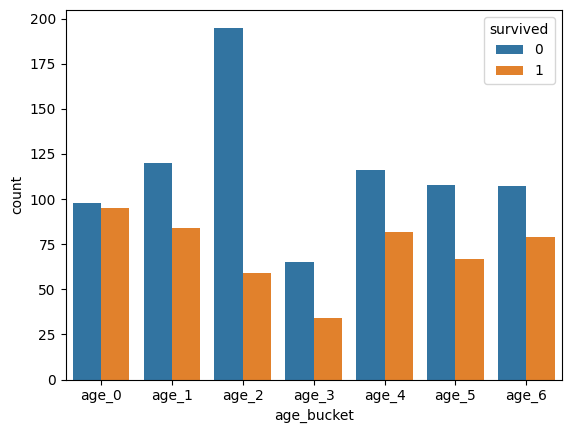

In [ ]:
sns.countplot(x="age_bucket", hue = "survived", data=df)
plt.show()

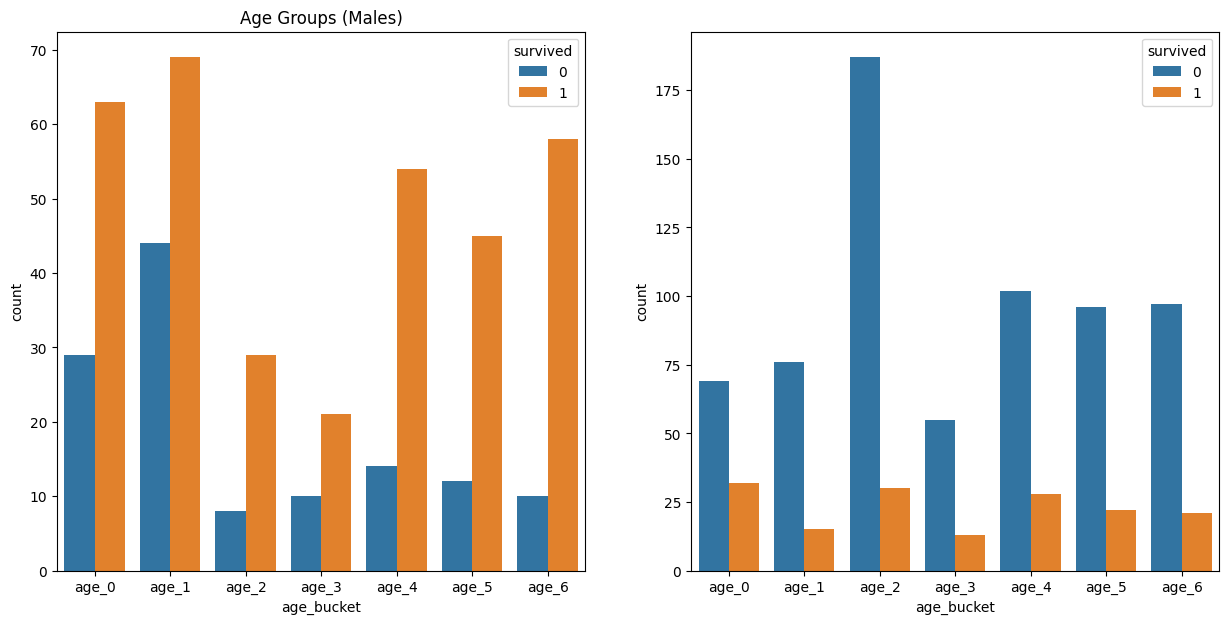

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,7))

axs[0].set_title('Age Groups (Females)')
sns.countplot(x='age_bucket', hue='survived', data= df[df['sex'] == 'female'], ax=axs[0])

axs[0].set_title('Age Groups (Males)')
sns.countplot(x='age_bucket', hue='survived', data= df[df['sex'] == 'male'], ax=axs[1])

plt.show()

Cabin

In [ ]:
df['deck'] = df['cabin'].apply(lambda cabin : cabin[0] if pd.notnull(cabin) else 'X')
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,num_in_party,num_in_party_grouped,age_bucket,deck
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1.0,Alone,age_4,B
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_0,C
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_0,C
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",4.0,Small,age_4,C
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_2,C
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1.0,Alone,age_6,E
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2.0,Small,age_6,D
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI",1.0,Alone,age_5,A
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",3.0,Small,age_6,C
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay",1.0,Alone,age_6,X


<Axes: xlabel='deck', ylabel='count'>

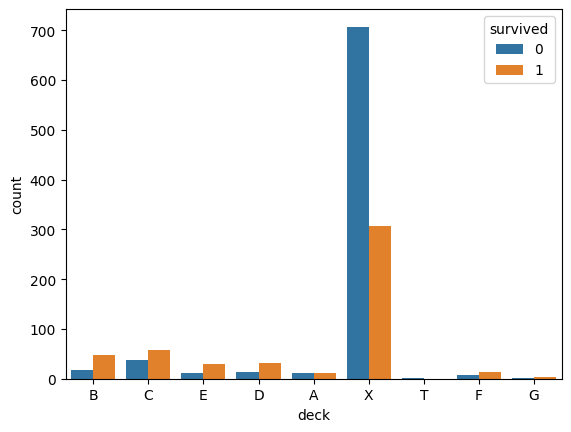

In [ ]:
sns.countplot(x='deck', hue='survived', data=df)

In [ ]:
df['deck_grouped'] = df['deck']

df['deck_grouped'] = df['deck_grouped'].replace(['A','B','C','T'], 'ABC')
df['deck_grouped'] = df['deck_grouped'].replace(['D','E'], 'DE')
df['deck_grouped'] = df['deck_grouped'].replace(['F','G'], 'FG')
df['deck_grouped'] = df['deck_grouped'].replace(['X'], 'X')

df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,num_in_party,num_in_party_grouped,age_bucket,deck,deck_grouped
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1.0,Alone,age_4,B,ABC
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_0,C,ABC
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_0,C,ABC
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",4.0,Small,age_4,C,ABC
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_2,C,ABC
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1.0,Alone,age_6,E,DE
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2.0,Small,age_6,D,DE
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI",1.0,Alone,age_5,A,ABC
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",3.0,Small,age_6,C,ABC
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay",1.0,Alone,age_6,X,X


In [ ]:
df_decks = df.groupby(['deck', 'pclass'])['pclass','survived','name']

for name, grp in df_decks:
  print(name)
  print(grp)
  print()

('A', 1.0)
     pclass survived                                               name
7       1.0        0                             Andrews, Mr. Thomas Jr
14      1.0        1               Barkworth, Mr. Algernon Henry Wilson
31      1.0        1                                   Blank, Mr. Henry
38      1.0        0                            Brady, Mr. John Bertram
68      1.0        1                           Chevre, Mr. Paul Romaine
74      1.0        0                        Clifford, Mr. George Quincy
93      1.0        1                              Dodge, Dr. Washington
94      1.0        1                          Dodge, Master. Washington
95      1.0        1              Dodge, Mrs. Washington (Ruth Vidaver)
99      1.0        1  Duff Gordon, Lady. (Lucille Christiana Sutherl...
100     1.0        1       Duff Gordon, Sir. Cosmo Edmund ('Mr Morgan')
101     1.0        0                       Dulles, Mr. William Crothers
105     1.0        0                           Evans,

<ipython-input-17-b48dd54e30f6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_decks = df.groupby(['deck', 'pclass'])['pclass','survived','name']


In [ ]:
df['fare'] = df['fare'].fillna(0)
FARE_BUCKETS = 10;

fare_labels = [f'fare_{i}' for i in range(FARE_BUCKETS)]

df['fare_bucket'] = pd.qcut(df['fare'], FARE_BUCKETS, labels=fare_labels)
df['fare_bucket'].value_counts()

fare_2    146
fare_1    144
fare_7    134
fare_0    132
fare_6    131
fare_9    131
fare_4    128
fare_8    128
fare_5    127
fare_3    108
Name: fare_bucket, dtype: int64

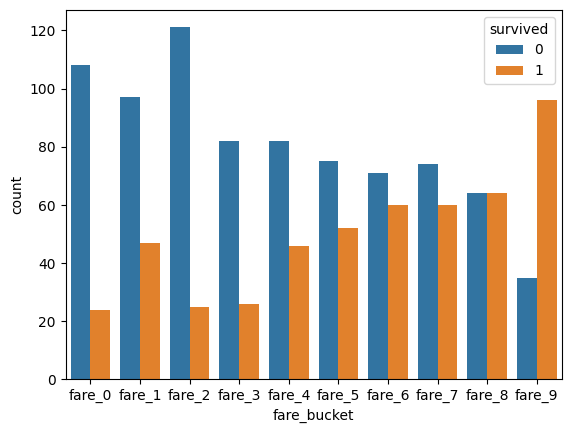

In [ ]:
sns.countplot(x="fare_bucket", hue = "survived", data=df)
plt.show()

In [ ]:
df['embarked'] = df['embarked'].fillna('S').astype('object')

In [ ]:
df['survived'] = df['survived'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pclass                1309 non-null   float64 
 1   survived              1309 non-null   int64   
 2   name                  1309 non-null   object  
 3   sex                   1309 non-null   category
 4   age                   1309 non-null   float64 
 5   sibsp                 1309 non-null   float64 
 6   parch                 1309 non-null   float64 
 7   ticket                1309 non-null   object  
 8   fare                  1309 non-null   float64 
 9   cabin                 295 non-null    object  
 10  embarked              1309 non-null   object  
 11  boat                  486 non-null    object  
 12  body                  121 non-null    object  
 13  home.dest             745 non-null    object  
 14  num_in_party          1309 non-null   float64 
 15  num_

In [ ]:
df2 = df.drop(['name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest', 'num_in_party'], axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pclass                1309 non-null   float64 
 1   survived              1309 non-null   int64   
 2   sex                   1309 non-null   category
 3   embarked              1309 non-null   object  
 4   num_in_party_grouped  1309 non-null   object  
 5   age_bucket            1309 non-null   category
 6   deck                  1309 non-null   object  
 7   deck_grouped          1309 non-null   object  
 8   fare_bucket           1309 non-null   category
dtypes: category(3), float64(1), int64(1), object(4)
memory usage: 66.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def ohe(df, col):
  le = LabelEncoder()
  a = le.fit_transform(df[col]).reshape(-1,1)
  columns = [f'{col}_{name}'for name in le.classes_]
  encoder = OneHotEncoder(sparse=False, categories='auto')
  result = pd.DataFrame(encoder.fit_transform(a),columns=columns)
  return result

In [ ]:
result = ohe(df2, 'num_in_party_grouped')
result.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,num_in_party_grouped_Alone,num_in_party_grouped_Large,num_in_party_grouped_Medium,num_in_party_grouped_Small
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0


In [ ]:
df_num_in_party = ohe(df2, 'num_in_party_grouped')
df_embarked = ohe(df2, 'embarked')
df_age_bucket = ohe(df2, 'age_bucket')
#df_deck_grouped = ohe(df2, 'deck_grouped')
#df_fare_bucket = ohe(df2, 'fare_bucket')

sex_encoder = LabelEncoder()
df2['sex'] = sex_encoder.fit_transform(df2['sex'])

fare_encoder = LabelEncoder()
df2['fare_bucket'] = fare_encoder.fit_transform(df2['fare_bucket'])

deck_encoder = LabelEncoder()
df2['deck'] = deck_encoder.fit_transform(df2['deck'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
labels = df2['survived']
features = df2[['pclass', 'sex', 'deck', 'fare_bucket']]

features= pd.concat([features, df_num_in_party, df_embarked, df_age_bucket], axis=1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pclass                       1309 non-null   float64
 1   sex                          1309 non-null   int64  
 2   deck                         1309 non-null   int64  
 3   fare_bucket                  1309 non-null   int64  
 4   num_in_party_grouped_Alone   1309 non-null   float64
 5   num_in_party_grouped_Large   1309 non-null   float64
 6   num_in_party_grouped_Medium  1309 non-null   float64
 7   num_in_party_grouped_Small   1309 non-null   float64
 8   embarked_C                   1309 non-null   float64
 9   embarked_Q                   1309 non-null   float64
 10  embarked_S                   1309 non-null   float64
 11  age_bucket_age_0             1309 non-null   float64
 12  age_bucket_age_1             1309 non-null   float64
 13  age_bucket_age_2  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

In [ ]:
models = [
    ['LogisticRegression', LogisticRegression()],
    ['KNeighborsClassifier', KNeighborsClassifier()],
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['SVC', SVC()],
    ['RandomForestClassifier', RandomForestClassifier()],
    ['GaussianNB', GaussianNB()],
]

In [ ]:
import warnings

warnings.filterwarnings('ignore')

for name, model in models:
  scores = cross_val_score(model, features, labels, cv=10)
  print(f'{name} = {scores.mean() * 100}')

LogisticRegression = 75.78332354668234
KNeighborsClassifier = 69.90252495596008
DecisionTreeClassifier = 71.34762184380506
SVC = 74.79095713446858
RandomForestClassifier = 72.80093951849678
GaussianNB = 43.16147974163241
